In [6]:
import pandas as pd

# Define the file path
file_path = 'results_sampled.txt'

# Initialize an empty list to store the data
data = []

# Open and read the file
with open(file_path, 'r') as file:
    for line in file:
        # Split the line into components
        parts = line.strip().split('\t')
        # Append the data to the list
        data.append({
            'domain_1': parts[0].strip(),
            'domain_2': parts[1].strip(),
            'similarity': float(parts[2].strip())
        })

# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df.head()

,domain_1,domain_2,similarity
0,All_Beauty,All_Beauty,0.275908
1,All_Beauty,Amazon_Fashion,0.215520
2,All_Beauty,Appliances,0.134449
3,All_Beauty,Arts_Crafts_and_Sewing,0.207983
4,All_Beauty,Automotive,0.141708


In [7]:
## Filter
# Remove duplicate rows
df['domain_1'] = df['domain_1'].str.strip()
df['domain_2'] = df['domain_2'].str.strip()

# Remove whitespace from domain_1 and domain_2 columns
df = df.drop_duplicates()

# Filter out rows where domain_1 equals domain_2
df = df[df['domain_1'] != df['domain_2']]

# Only books in the domain_1 column
df = df[df['domain_1'].str.contains('Books')]

# sort the DataFrame by the 'similarity' column in descending order
df = df.sort_values(by='similarity', ascending=False)

df.head(300)

,domain_1,domain_2,similarity
484,Books,Kindle_Store,0.183448
486,Books,Movies_and_TV,0.144220
493,Books,Subscription_Boxes,0.117509
474,Books,CDs_and_Vinyl,0.114680
485,Books,Magazine_Subscriptions,0.113869
476,Books,Digital_Music,0.111325
491,Books,Software,0.097412
495,Books,Toys_and_Games,0.096307
480,Books,Handmade_Products,0.090098
496,Books,Video_Games,0.074951


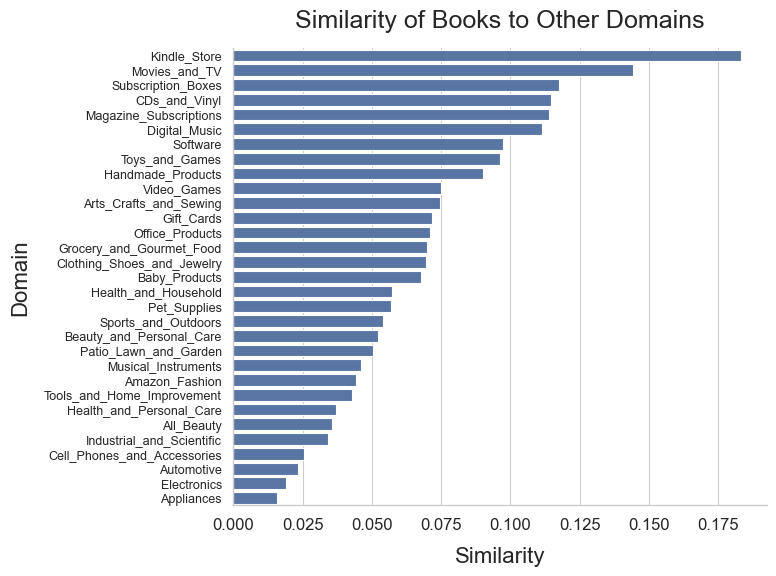

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid", context="paper", font_scale=1.5)

# Plot the data
plt.figure(figsize=(8, 6))  # Adjust size to be more compact for print
barplot = sns.barplot(x='similarity', y='domain_2', data=df, color='#4C72B0')

# Add labels and title
plt.xlabel('Similarity', fontsize=16, labelpad=10)
plt.ylabel('Domain', fontsize=16, labelpad=10)
plt.title('Similarity of Books to Other Domains', fontsize=18, pad=15)

# Customize the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=9)  # Reduced font size for domain labels

# Remove top and right spines for a clean look
sns.despine()

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


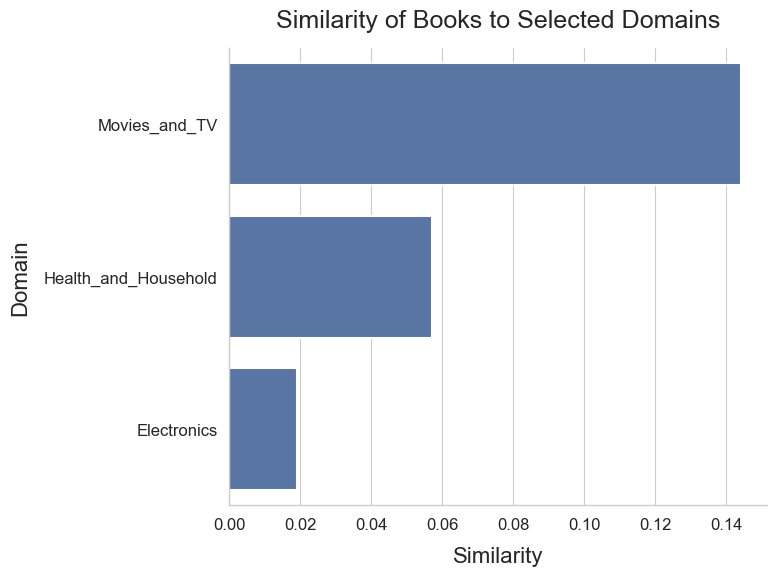

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for the specified domains
filtered_df = df[df['domain_2'].isin(['Movies_and_TV', 'Health_and_Household', 'Electronics'])]

# Set the style
sns.set(style="whitegrid", context="paper", font_scale=1.5)

# Plot the data
plt.figure(figsize=(8, 6))  # Adjust size to be more compact for print
barplot = sns.barplot(
    x='similarity', 
    y='domain_2', 
    data=filtered_df, 
    color='#4C72B0', 
    linewidth=1.5  # Add a border to make bars look thinner
)

# Add labels and title
plt.xlabel('Similarity', fontsize=16, labelpad=10)
plt.ylabel('Domain', fontsize=16, labelpad=10)
plt.title('Similarity of Books to Selected Domains', fontsize=18, pad=15)

# Customize the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)  # Reduced font size for domain labels

# Remove top and right spines for a clean look
sns.despine()

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


/var/folders/sh/fjb1r_5j6gxcy4lzfcc4_4zr0000gn/T/ipykernel_16277/13486075.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


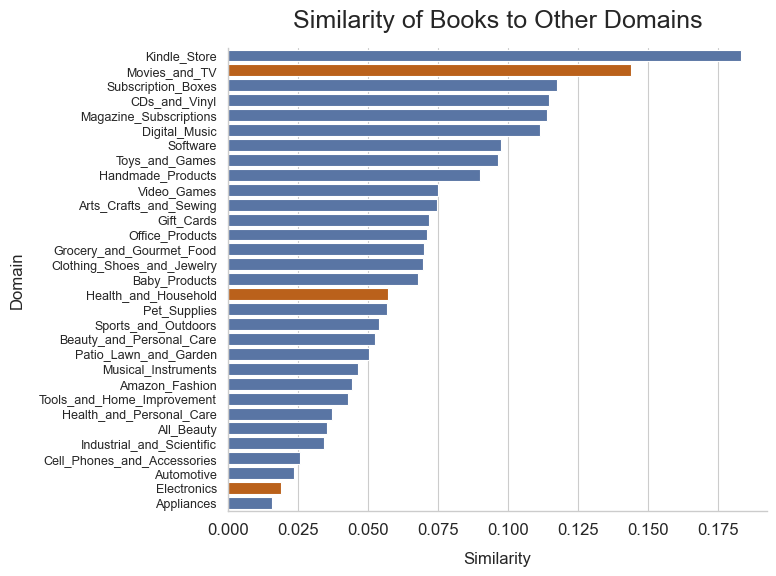

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the domains to highlight
highlight_domains = ['Movies_and_TV', 'Health_and_Household', 'Electronics']

# Create a color mapping for the domains
color_mapping = {
    domain: '#D55E00' if domain in highlight_domains else '#4C72B0' 
    for domain in df['domain_2']
}

# Set the style
sns.set(style="whitegrid", context="paper", font_scale=1.5)

# Plot the data
plt.figure(figsize=(8, 6))  # Adjust size to be more compact for print
barplot = sns.barplot(
    x='similarity', 
    y='domain_2', 
    data=df, 
    palette=color_mapping  # Use the dictionary for color mapping
)

# Add labels and title
plt.xlabel('Similarity', fontsize=12, labelpad=10)
plt.ylabel('Domain', fontsize=12, labelpad=10)
plt.title('Similarity of Books to Other Domains', fontsize=18, pad=15)

# Customize the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=9)  # Reduced font size for domain labels

# Remove top and right spines for a clean look
sns.despine()

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


In [11]:
import pandas as pd

# Read the CSV file the first time without header
df1 = pd.read_csv('similarity_results_sampled.csv', sep=',', header=0)
df1.columns = ['domain_1', 'domain_2', 'similarity']

# Read the CSV file the second time without header and flip the first two columns
df2 = pd.read_csv('similarity_results_sampled.csv', sep=',', header=0)
df2.columns = ['domain_1', 'domain_2', 'similarity']
df2 = df2[['domain_2', 'domain_1', 'similarity']]
df2.columns = ['domain_1', 'domain_2', 'similarity']

# Combine both DataFrames
combined_df = pd.concat([df1, df2])

# Remove duplicates
combined_df = combined_df.drop_duplicates()

# Display the combined DataFrame
print("df1 size: ", df1.shape)
combined_df.shape

df1 size:  (465, 3)


(900, 3)

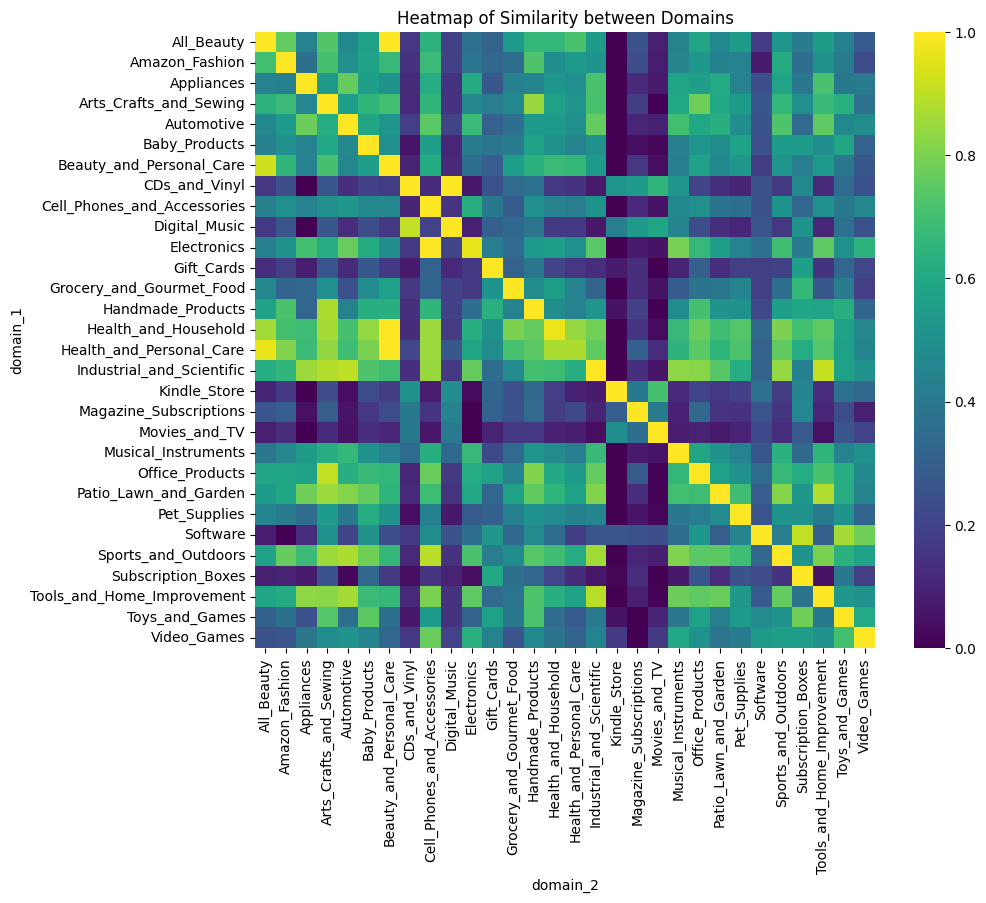

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Max-min normalize the similarity grouped by domain_1
combined_df['similarity'] = combined_df.groupby('domain_1')['similarity'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

# Create a pivot table for the heatmap
pivot_table = combined_df.pivot(index='domain_1', columns='domain_2', values='similarity')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=False, cmap='viridis')
plt.title('Heatmap of Similarity between Domains')
plt.show()